## ML 

In [1]:
!python3 -m pip install --user --upgrade pip==9.0.3

Requirement already up-to-date: pip==9.0.3 in /Users/shaleenanandtaneja/Library/Python/3.7/lib/python/site-packages
You are using pip version 9.0.3, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [7]:
import pip

def install(package):
    if hasattr(pip, 'main'):
        pip.main(['install', package])
    else:
        pip._internal.main(['install', package])

In [3]:
install('pandas')

You are using pip version 9.0.3, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
#https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records

In [1]:
import pandas as pd 
df = pd.read_csv('house-votes-84.data', header=None)

### Numerical EDA

In [2]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [3]:
df.columns = ['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']


In [4]:
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
party                435 non-null object
infants              435 non-null object
water                435 non-null object
budget               435 non-null object
physician            435 non-null object
salvador             435 non-null object
religious            435 non-null object
satellite            435 non-null object
aid                  435 non-null object
missile              435 non-null object
immigration          435 non-null object
synfuels             435 non-null object
education            435 non-null object
superfund            435 non-null object
crime                435 non-null object
duty_free_exports    435 non-null object
eaa_rsa              435 non-null object
dtypes: object(17)
memory usage: 57.9+ KB


In [5]:
df.describe()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
count,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435
unique,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


### Visual EDA

In [8]:
install('matplotlib')
install('seaborn')

You are using pip version 9.0.3, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


You are using pip version 9.0.3, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

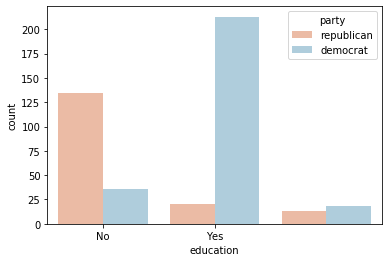

In [10]:
plt.figure()
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

In [11]:
import numpy as np

In [12]:
df.replace('?', np.NaN, inplace=True)

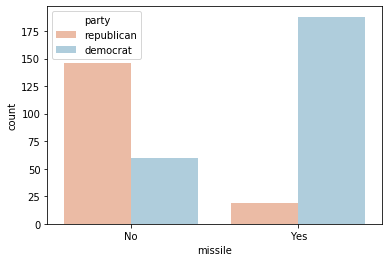

In [13]:
plt.figure()
sns.countplot(x='missile', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

### KNN

In [17]:
install('sklearn')

You are using pip version 9.0.3, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [14]:
df.replace('n',0,inplace=True) # for numerical arrays as input 
df.replace('y',1,inplace=True)
df.fillna(0,inplace=True) # no null values should be present 

In [15]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = df['party'].values # response
X = df.drop('party', axis=1).values # features

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

### Digits data

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping 

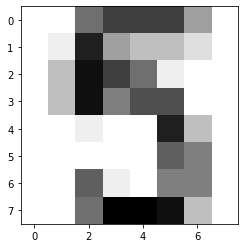

In [17]:
# Import necessary modules
from sklearn import datasets

#http://yann.lecun.com/exdb/mnist/

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.data.shape)
print(digits.images.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [30]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data # i/p features
y = digits.target # response 

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=80, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9888888888888889


In [31]:
knn.predict(X_test)

array([0, 2, 1, 8, 3, 3, 6, 1, 9, 1, 5, 2, 2, 0, 2, 5, 9, 0, 1, 7, 0, 4,
       9, 0, 8, 0, 9, 1, 8, 3, 1, 7, 6, 3, 7, 1, 7, 5, 3, 8, 3, 5, 5, 9,
       1, 4, 7, 7, 4, 5, 4, 6, 6, 5, 9, 7, 0, 3, 9, 9, 5, 4, 5, 3, 3, 2,
       0, 5, 9, 8, 0, 8, 8, 3, 6, 0, 9, 4, 5, 9, 8, 1, 6, 4, 4, 4, 9, 1,
       7, 5, 0, 6, 8, 9, 5, 8, 4, 1, 3, 6, 8, 2, 1, 5, 8, 9, 5, 2, 1, 3,
       1, 2, 6, 1, 5, 4, 2, 8, 1, 4, 7, 5, 1, 0, 3, 6, 9, 5, 0, 7, 9, 6,
       5, 1, 7, 1, 7, 1, 0, 6, 0, 4, 5, 7, 3, 0, 3, 6, 5, 7, 5, 5, 2, 0,
       4, 0, 5, 0, 3, 7, 7, 1, 4, 6, 7, 9, 2, 5, 2, 1, 8, 8, 9, 0, 9, 4,
       5, 6, 0, 3, 6, 4, 2, 6, 4, 0, 5, 5, 6, 8, 6, 0, 6, 8, 3, 3, 4, 6,
       3, 6, 1, 2, 6, 1, 1, 0, 0, 8, 6, 8, 8, 8, 3, 0, 4, 3, 9, 8, 5, 4,
       2, 3, 1, 9, 0, 2, 7, 4, 9, 4, 8, 2, 7, 5, 2, 8, 5, 4, 4, 5, 7, 6,
       4, 4, 8, 4, 5, 3, 0, 8, 9, 8, 4, 3, 7, 8, 3, 2, 4, 6, 3, 9, 0, 2,
       2, 2, 9, 7, 9, 0, 8, 8, 3, 7, 4, 3, 0, 2, 3, 1, 7, 0, 4, 7, 4, 2,
       5, 7, 7, 2, 7, 2, 0, 9, 8, 9, 1, 6, 6, 5, 3,

In [33]:
y_test

array([0, 2, 1, 8, 3, 3, 6, 1, 9, 1, 5, 2, 2, 0, 2, 5, 9, 0, 1, 7, 0, 4,
       9, 0, 8, 0, 9, 1, 8, 9, 1, 7, 6, 3, 7, 1, 7, 5, 3, 8, 3, 5, 5, 9,
       1, 4, 7, 7, 4, 5, 4, 6, 6, 5, 9, 7, 0, 3, 9, 9, 5, 4, 5, 3, 3, 2,
       0, 5, 9, 8, 0, 8, 8, 3, 6, 0, 9, 4, 9, 9, 8, 1, 6, 4, 4, 4, 9, 1,
       7, 5, 0, 6, 8, 9, 5, 8, 4, 1, 3, 6, 8, 2, 1, 5, 8, 9, 5, 2, 1, 3,
       1, 2, 6, 1, 5, 4, 2, 8, 1, 4, 7, 5, 1, 0, 3, 6, 9, 5, 0, 7, 9, 6,
       5, 8, 7, 1, 7, 1, 0, 6, 0, 4, 5, 7, 3, 0, 3, 6, 5, 7, 5, 5, 2, 0,
       4, 0, 5, 0, 3, 7, 7, 1, 4, 6, 7, 9, 2, 5, 2, 1, 8, 8, 9, 0, 9, 4,
       5, 6, 0, 3, 6, 4, 2, 6, 4, 0, 5, 5, 6, 8, 6, 0, 6, 8, 3, 3, 4, 6,
       3, 6, 1, 2, 6, 1, 1, 0, 0, 8, 6, 8, 8, 8, 3, 0, 4, 3, 9, 8, 5, 4,
       2, 3, 1, 9, 0, 2, 7, 4, 9, 4, 8, 2, 7, 5, 2, 8, 5, 4, 4, 5, 7, 6,
       4, 4, 8, 4, 5, 3, 0, 8, 9, 8, 4, 3, 7, 8, 3, 2, 4, 6, 3, 9, 0, 2,
       2, 2, 9, 7, 9, 0, 8, 8, 3, 7, 4, 3, 0, 2, 3, 1, 7, 0, 4, 7, 4, 2,
       5, 7, 7, 2, 7, 2, 0, 9, 8, 9, 1, 6, 6, 5, 3,

In [22]:
# 100 digits

# 30 5-label
# 20 4-label
# 10 3-label
# .....


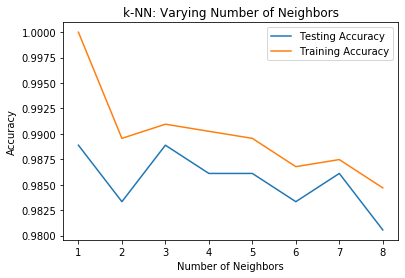

In [29]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

## Regression

In [36]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the CSV file into a DataFrame: df
df = pd.read_csv('gapminder.csv') # https://www.gapminder.org/data/

# Create arrays for features and target variable
y = df['life'].values
X = df['fertility'].values

print(X)
# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1,1)
X = X.reshape(-1,1)

print(X)
# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

[2.73 6.43 2.24 1.4  1.96 1.41 1.99 1.89 2.38 1.83 1.42 1.82 2.91 5.27
 2.51 3.48 2.86 1.9  1.43 6.04 6.48 3.05 5.17 1.68 6.81 1.89 2.43 5.05
 5.1  1.91 4.91 1.43 1.5  1.89 3.76 2.73 2.95 2.32 5.31 5.16 1.62 2.74
 1.85 1.97 4.28 5.8  1.79 1.37 4.19 1.46 4.12 5.34 5.25 2.74 3.5  3.27
 1.33 2.12 2.64 2.48 1.88 2.   2.92 1.39 2.39 1.34 2.51 4.76 1.5  1.57
 3.34 5.19 1.42 1.63 4.79 5.78 2.05 2.38 6.82 1.38 4.94 1.58 2.35 1.49
 2.37 2.44 5.54 2.05 2.9  1.77 2.12 2.72 7.59 6.02 1.96 2.89 3.58 2.61
 4.07 3.06 2.58 3.26 1.33 1.36 2.2  1.34 1.49 5.06 5.11 1.41 5.13 1.28
 1.31 1.43 7.06 2.54 1.42 2.32 4.79 2.41 3.7  1.92 1.47 3.7  5.54 1.48
 4.88 1.8  2.04 2.15 6.34 1.38 1.87 2.07 2.11 2.46 1.86 5.88 3.85]
Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
[[2.73]
 [6.43]
 [2.24]
 [1.4 ]
 [1.96]
 [1.41]
 [1.99]
 [1.89]
 [2.38]
 [1.83]
 [1.42]
 [1.82]
 [2.91]
 [5.27]
 [2.51]
 [3.48]
 [2.86]
 [1.9 ]
 [1.43]
 [6.04]
 [6.48]
 [3.05]
 [5.17]
 [1.68]
 [6.81]
 [1.89]
 [2.

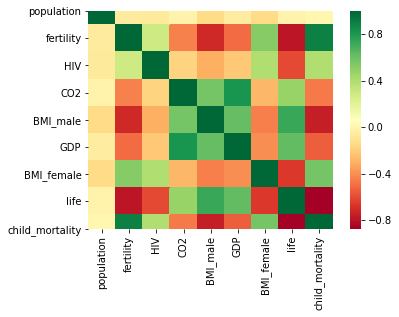

In [37]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

0.6192442167740035


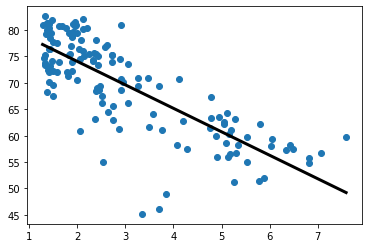

In [38]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

X_fertility = X

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility,y )

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot the original data
plt.scatter(X_fertility, y )

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()


### Train and Test data 

In [27]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.7298987360907494
Root Mean Squared Error: 4.194027914110243


### 5 fold cv

In [40]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score 

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X,y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.71001079 0.75007717 0.55271526 0.547501   0.52410561]
Average 5-Fold CV Score: 0.6168819644425119


### k-fold cross validation

In [41]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X,y, cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv=10)
print(np.mean(cvscores_10))

0.6294715754653507
0.5883937741571185


### Accuracy Metrics

In [42]:
diabetes = pd.read_csv('diabetes_data.csv') # https://www.kaggle.com/uciml/pima-indians-diabetes-database
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Confusion Matrix
<img src="img/confusion_matrix.png" width="400">

### Classification Report
<img src="img/classification_report.png" width="400" />

In [44]:
# Import necessary modules
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y = diabetes['diabetes']
X = diabetes.drop('diabetes', axis=1)

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=9)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print('Confusion Matrix \n', confusion_matrix(y_test, y_pred), '\n')
print('Classifications Report \n', classification_report(y_test, y_pred))


Confusion Matrix 
 [[168  38]
 [ 49  53]] 

Classifications Report 
               precision    recall  f1-score   support

           0       0.77      0.82      0.79       206
           1       0.58      0.52      0.55       102

    accuracy                           0.72       308
   macro avg       0.68      0.67      0.67       308
weighted avg       0.71      0.72      0.71       308



In [45]:
from sklearn.linear_model import LogisticRegression

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print('Confusion Matrix \n', confusion_matrix(y_test, y_pred), '\n')
print('Classifications Report \n', classification_report(y_test, y_pred))


Confusion Matrix 
 [[174  32]
 [ 36  66]] 

Classifications Report 
               precision    recall  f1-score   support

           0       0.83      0.84      0.84       206
           1       0.67      0.65      0.66       102

    accuracy                           0.78       308
   macro avg       0.75      0.75      0.75       308
weighted avg       0.78      0.78      0.78       308



/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


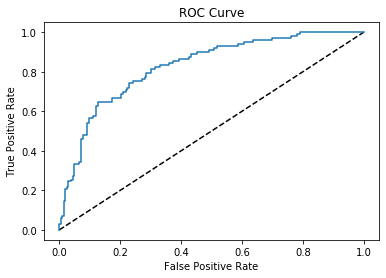

In [33]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Area under AUC

In [46]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))


AUC: 0.8269084332762232
AUC scores computed using 5-fold cross-validation: [0.79888889 0.80777778 0.81944444 0.86622642 0.85037736]


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

### HyperParameter Tuning

In [ ]:
# import warnings
# warnings.filterwarnings('ignore')

# # Import necessary modules
# from sklearn.linear_model import KNe
# from sklearn.model_selection import GridSearchCV

# # Setup the hyperparameter grid
# c_space = np.logspace(-5, 8, 15)
# param_grid = {'C': c_space}

# # Instantiate a logistic regression classifier: logreg
# logreg = LogisticRegression()

# # Instantiate the GridSearchCV object: logreg_cv
# logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# # Fit it to the data
# logreg_cv.fit(X,y)

In [49]:
import warnings
warnings.filterwarnings('ignore')

# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
# c_space = np.logspace(-5, 8, 15)
param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}

# Instantiate a logistic regression classifier: logreg
knn = KNeighborsClassifier()

# Instantiate the GridSearchCV object: logreg_cv
knn_cv = GridSearchCV(knn, param_grid, cv=5)

knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [50]:
print("Tuned Logistic Regression Parameters: {}".format(knn_cv.best_params_)) 
print("Best score is {}".format(knn_cv.best_score_))

Tuned Logistic Regression Parameters: {'n_neighbors': 8}
Best score is 0.75


### Randomized Grid Search

<p>GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions. </p>

In [55]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X,y )

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 1}
Best score is 0.7395833333333334


## Preprocessing data

### Dummy variables

In [45]:
df = pd.read_csv('gapminder.csv')

In [46]:
# One hot encoding
# Create dummy variables: df_region
df_region = pd.get_dummies(df)

# Print the columns of df_region
print(df_region.columns)

# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(df, drop_first=True) # drop first means that k-1 categories produced as 1 would be redundant 

# Print the new columns of df_region
print(df_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')
Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


In [47]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.5, normalize=True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge,X,y, cv=5)

# Print the cross-validated scores
print(ridge_cv)

[0.26648172 0.23084647 0.27355543 0.24898795 0.25673452]


In [48]:
# Convert '?' to NaN
df[df == '?'] = np.nan

# Print the number of NaNs
print(df.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df.shape))

# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))

population         0
fertility          0
HIV                0
CO2                0
BMI_male           0
GDP                0
BMI_female         0
life               0
child_mortality    0
Region             0
dtype: int64
Shape of Original DataFrame: (139, 10)
Shape of DataFrame After Dropping All Rows with Missing Values: (139, 10)


### ML Pipeline

In [50]:
# Import necessary modules
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
        ('SVM', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       151
           1       0.00      0.00      0.00        80

    accuracy                           0.65       231
   macro avg       0.33      0.50      0.40       231
weighted avg       0.43      0.65      0.52       231



### Centering & Scaling

In [51]:
# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train,y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.7012987012987013
Accuracy without Scaling: 0.6883116883116883


### Pipeline for classification

In [52]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, param_grid=parameters, cv=3)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        94
           1       0.78      0.52      0.62        60

    accuracy                           0.75       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.76      0.75      0.74       154

Tuned Model Parameters: {'SVM__C': 1, 'SVM__gamma': 0.01}


### Pipeline for regression

In [54]:
from sklearn.linear_model import ElasticNet
# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, param_grid=parameters, cv=3)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.22549670336491257
